Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 0.2837 - accuracy: 0.9189 - val_loss: 0.1328 - val_accuracy: 0.9597
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.9641 - val_loss: 0.1004 - val_accuracy: 0.9694
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9764
Test accuracy: 0.9764000177383423
预测结果： 9


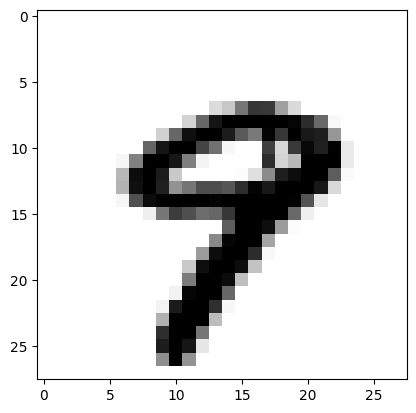

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# 加载数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_ori=x_test
# 数据预处理
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
history = model.fit(x_train, y_train, 
                    epochs=8, 
                    batch_size=128, 
                    validation_data=(x_test, y_test))
# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# 预测第10个测试数据的结果
predictions = model.predict(np.array([x_test[9]]))
print("预测结果：", np.argmax(predictions))

# 绘制第10个测试数据的图形
plt.imshow(x_test_ori[9], cmap=plt.cm.binary)
plt.show()